In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import utils as ut

months = ut.generate_dates()

#creation of a dataframe containing the following data : dates product A product B product C product D
product_A = ut.generate_random_sales(50, 100, len(months))
product_B = ut.generate_random_sales(30, 80, len(months))
product_C = ut.generate_random_sales(20, 60, len(months))
product_D = ut.generate_random_sales(10, 50, len(months))

df_initial = pd.DataFrame({
    'Month': months,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})

#saving the dataframe into a cv file named initial
df_initial.to_csv('data/initial.csv', index=False)

df_initial


ModuleNotFoundError: No module named 'seaborn'

In [3]:
import pandas as pd


df = pd.read_csv('data/initial.csv')

# Ensure Month column is datetime
df['Month'] = pd.to_datetime(df['Month'])


# Total sales per month (sum of all products)
df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)

# Average sales per month
df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)

# Month-over-month growth (percentage change of Total_Sales)
df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change() * 100


# -----------------------------------------
# 2. Assign Quarter
# -----------------------------------------

def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df['Quarter'] = df['Month'].dt.month.apply(get_quarter)



#product name with highest sales
df['Max_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)

#product name with lowest sales
df['Min_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1)


# -----------------------------------------
# 4. Save as final.csv
# -----------------------------------------

df.to_csv("data/final.csv", index=False)

df


,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,63,30,46,20,159,39.75,NaN,Q1,Product_A,Product_D
1,2025-02-01,74,70,50,12,206,51.50,29.559748,Q1,Product_A,Product_D
2,2025-03-01,55,58,33,22,168,42.00,-18.446602,Q1,Product_B,Product_D
3,2025-04-01,76,41,46,34,197,49.25,17.261905,Q2,Product_A,Product_D
4,2025-05-01,85,56,51,14,206,51.50,4.568528,Q2,Product_A,Product_D
5,2025-06-01,88,34,36,21,179,44.75,-13.106796,Q2,Product_A,Product_D
6,2025-07-01,57,48,26,50,181,45.25,1.117318,Q3,Product_A,Product_C
7,2025-08-01,99,62,50,22,233,58.25,28.729282,Q3,Product_A,Product_D
8,2025-09-01,59,36,41,20,156,39.00,-33.047210,Q3,Product_A,Product_D
9,2025-10-01,73,61,26,43,203,50.75,30.128205,Q4,Product_A,Product_C


In [19]:


df = pd.read_csv('data/final.csv', parse_dates=['Month'])

# ---- PIVOT TABLE 1: Average sales per quarter per product ----
pivot_avg = df.pivot_table(
    values=['Product_A','Product_B','Product_C','Product_D'],
    index='Quarter',
    aggfunc='mean'
)

# Add Total Average per Quarter
pivot_avg['Total_Average'] = pivot_avg.sum(axis=1)

# ---- PIVOT TABLE 2: Total sales per quarter ----
pivot_total = df.pivot_table(
    values='Total_Sales',
    index='Quarter',
    aggfunc='sum'
)

# ---- SUMMARY METRICS ----

# 1. Best month (highest total sales)
best_month_date = df.loc[df['Total_Sales'].idxmax(), 'Month']
best_month_value = df['Total_Sales'].max()

# 2. Best product (highest overall annual total)
product_totals = df[['Product_A','Product_B','Product_C','Product_D']].sum()
best_product = product_totals.idxmax()
best_product_value = product_totals.max()

# 3. Best quarter (highest total sales)
best_quarter_value = pivot_total['Total_Sales'].max()
best_quarter = pivot_total['Total_Sales'].idxmax()

# ---- CREATE OUTPUT CSV ----

output = []

output.append("=== Pivot Table: Average Sales per Quarter per Product ===")
output.append(pivot_avg.to_csv())

output.append("=== Pivot Table: Total Sales per Quarter ===")
output.append(pivot_total.to_csv())

output.append("=== Summary Metrics ===")
output.append(f"Best Month: {best_month_date.date()}")
output.append(f"Best Product: {best_product}")
output.append(f"Best Quarter: {best_quarter}")

# Save everything to output.csv
with open('data/output.csv', 'w') as f:
    for block in output:
        f.write(block + "\n")

"Output saved to data/output.csv"


'Output saved to data/output.csv'

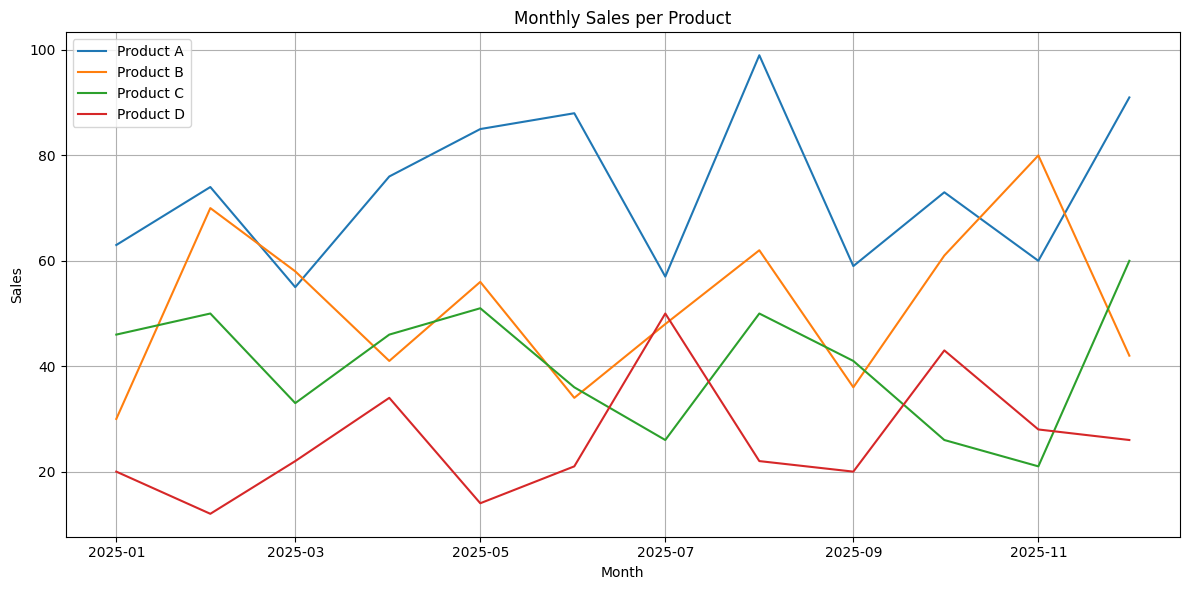

In [9]:
df = pd.read_csv('data/final.csv', parse_dates=['Month'])
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Product_A'], label='Product A')
plt.plot(df['Month'], df['Product_B'], label='Product B')
plt.plot(df['Month'], df['Product_C'], label='Product C')
plt.plot(df['Month'], df['Product_D'], label='Product D')

plt.title("Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


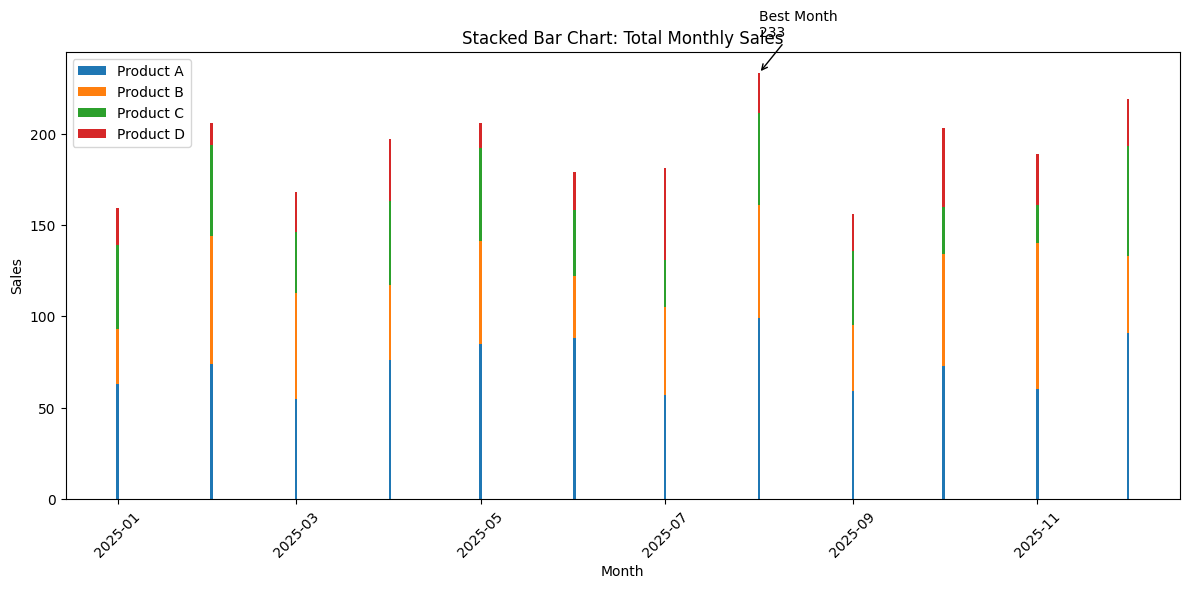

In [10]:
plt.figure(figsize=(12, 6))

plt.bar(df['Month'], df['Product_A'], label='Product A')
plt.bar(df['Month'], df['Product_B'], bottom=df['Product_A'], label='Product B')
plt.bar(df['Month'], df['Product_C'], bottom=df['Product_A']+df['Product_B'], label='Product C')
plt.bar(df['Month'], df['Product_D'], bottom=df['Product_A']+df['Product_B']+df['Product_C'], label='Product D')

plt.title("Stacked Bar Chart: Total Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Highlight best month
best_idx = df['Total_Sales'].idxmax()
best_month = df['Month'][best_idx]
best_value = df['Total_Sales'][best_idx]

plt.annotate(
    f"Best Month\n{best_value}",
    xy=(best_month, best_value),
    xytext=(best_month, best_value + 20),
    arrowprops=dict(arrowstyle="->")
)

plt.tight_layout()
plt.show()


In [14]:
import seaborn as sns
heatmap_data = df[['Product_A','Product_B','Product_C','Product_D']]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Monthly Sales per Product")
plt.xlabel("Month (index order)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'seaborn'

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Product_A','Product_B','Product_C','Product_D']])
plt.title("Boxplot: Sales Distribution per Product")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


AttributeError: module 'sns' has no attribute 'boxplot'

<Figure size 1000x600 with 0 Axes>

In [20]:
best_month = None
best_product = None
best_quarter = None
with open('data/output.csv', 'r') as f:
    lines = f.readlines()
for line in lines:
    line = line.strip()
    if line.startswith("Best Month:"):
        best_month = line.replace("Best Month: ", "")
    elif line.startswith("Best Product:"):
        best_product = line.replace("Best Product: ", "")
    elif line.startswith("Best Quarter:"):
        best_quarter = line.replace("Best Quarter: ", "")


print("As a conclsion and a response to the 6th part of the project")
print("The product that contributed the most to sales over the year is", best_product )
print("the quarter with the highest sales is ", best_quarter)
print("using these information we could improve our marketing strategy accordingly")
print(f"we can now increase our stock amount for the best seller {best_product} and focus on advertising our store and give some kind of reduction throught out the quarters other than {best_quarter}")

As a conclsion and a response to the 6th part of the project
The product that contributed the most to sales over the year is Product_A
the quarter with the highest sales is  Q4
using these information we could improve our marketing strategy accordingly
we can now increase our stock amount for the best seller Product_A and focus on advertising our store and give some kind of reduction throught out the quarters other than Q4
